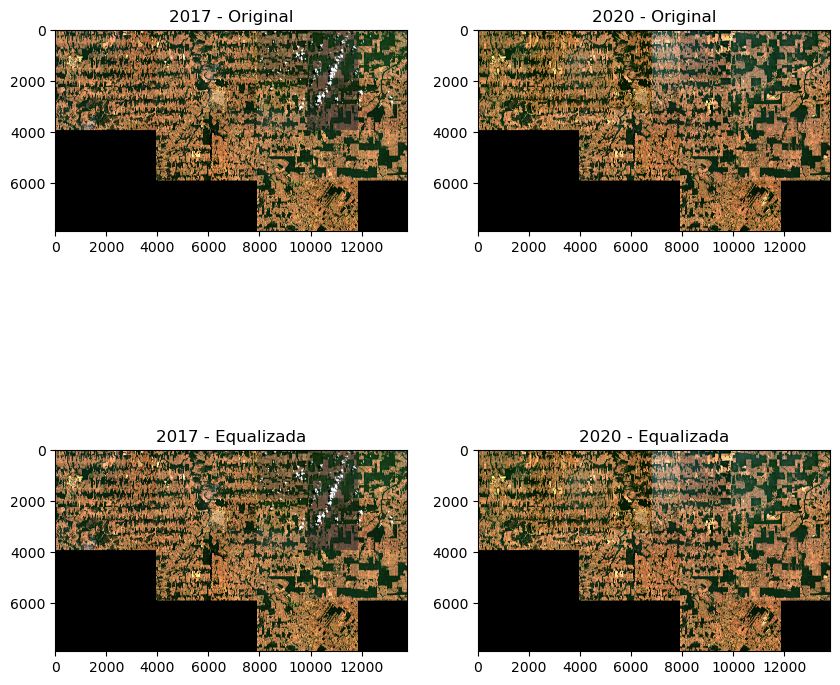

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import rasterio
from rasterio.plot import show as r_show
os.chdir('/home/me/workspace/det_remota/trabalho_final')

MOSAICS = [
    'data/sentinel2/preprocessed/raw_mosaics/2017_8.tiff',
    'data/sentinel2/preprocessed/raw_mosaics/2020_8.tiff',
    'data/sentinel2/preprocessed/equalized_mosaics/2017_8.tiff',
    'data/sentinel2/preprocessed/equalized_mosaics/2020_8.tiff',
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = sum(axes.tolist(), [])
for ((ax, img_path), ano), tipo in zip(zip(zip(axes, MOSAICS), [2017, 2020, 2017, 2020]), ['Original','Original','Equalizada','Equalizada',]):
    r_show(rasterio.open(img_path).read([1,2,3]), ax=ax)
    ax.set_title(f'{ano} - {tipo}')
    ax.set_xlabel(None)
    ax.set_ylabel(None)

plt.show()


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as 

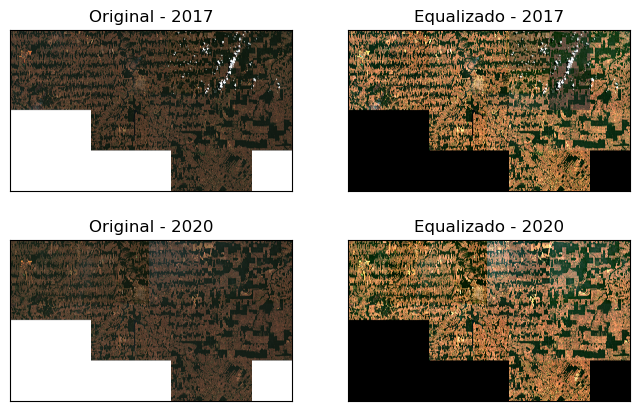

In [29]:

from pathlib import Path

import rasterio.merge

PATH_RAW_CELLS = Path('data/sentinel2/raw/TRUE_COLOR')
PATH_EQUALIZED_RASTER = Path('data/sentinel2/preprocessed/equalized_mosaics')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

for ano, axes_row in zip((2017, 2020), axes):
    raw_path = PATH_RAW_CELLS /  str(ano) / '8'
    rasters = [rasterio.open(file) for file in raw_path.glob('*.tiff')]
    raw_raster, _ = rasterio.merge.merge(rasters)
    
    eq_path = PATH_EQUALIZED_RASTER / f'{ano}_8.tiff'
    eq_raster = rasterio.open(eq_path).read([1,2,3])

    r_show(raw_raster, ax=axes_row[0])
    axes_row[0].set_title(f'Original - {ano}')
    r_show(eq_raster, ax=axes_row[1])
    axes_row[1].set_title(f'Equalizado - {ano}')


    for ax in axes_row:
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_xticks([])
        ax.set_yticks([])

plt.show()